In [157]:
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

In [23]:
# Load data into memory
dataset_names = ["avazu","IoT","wiki_de","wiki_en","horton","retailrocket","taxi","alibaba","google"]
sampling_rates = ["1h","15min","5min"]

dataset_name = "google"
datasets = {}
for sampling_rate in sampling_rates:
    df = pd.read_csv(f"data/{dataset_name}_{sampling_rate}.csv", index_col=0, parse_dates=True)
    df.name = f"{dataset_name}_{sampling_rate}"
    datasets[sampling_rate] = df

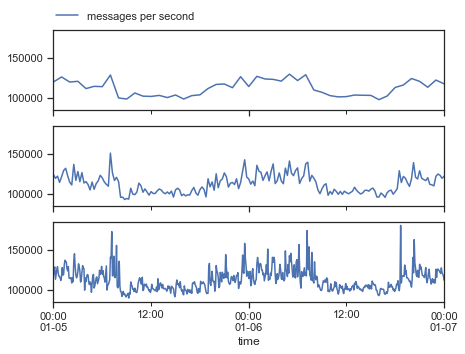

In [64]:
f, axs = plt.subplots(ncols=1, nrows=3, sharey=True, sharex=True, figsize=(7,5))
#f.tight_layout(pad=0)
sns.set_theme(style='ticks')

for (sampling_rate, df), ax in zip(datasets.items(), axs):
    sns.lineplot(data=df["1970-01-05 00:00:00":"1970-01-07 00:00:00"], ax=ax)
    
    #ax.title.set_text(sampling_rate)
    #ax.set(xlabel="")
    
    ax.set_xlim(4, 6)
    ax.get_legend().remove()

    #ax.axvline(1440*5, color="k")

    #for idx, _ in x.groupby("time").mean().sort_values(df.name)[:steps].iterrows():
    #    ax.axvspan(idx, idx+30, facecolor="0.5", alpha=0.5, lw=0)
    
    ticks = [4,5,6]
    ax.set_xticks(ticks)
    ax.set_xticklabels(["00:00\n01-05", "00:00\n01-06", "00:00\n01-07"])
    ax.set_xticks([4.5, 5.5], minor=True)
    ax.set_xticklabels(["12:00", "12:00"], minor=True)

ax.set(xlabel="time")
#f.text(-0.075, 0.5, "Carbon intensity (gCO2/kWh)", ha="center", va="center", rotation="vertical")

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, ["messages per second"], loc='upper left', bbox_to_anchor=(0.11, 0.96), frameon=False, ncol=len(labels))


plt.savefig("sampling_rate.png", dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='date'>

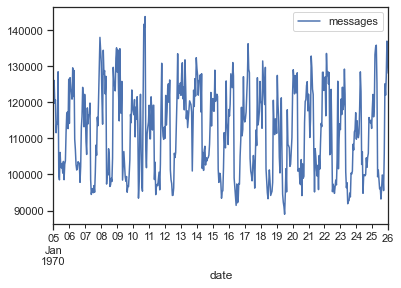

In [65]:
datasets["1h"].plot()

In [70]:
# Load data into memory
datasets = {}  # {dataset_name: {sampling_rate: df}}
for dataset_name in dataset_names:
    sampling_rate = "1h"
    data = pd.read_csv(f"data/{dataset_name}_{sampling_rate}.csv", index_col=0, parse_dates=True)
    datasets[dataset_name] = data
datasets

{'avazu':                           messages
 date                              
 2014-10-21 00:00:00  105533.129121
 2014-10-21 01:00:00  107869.407462
 2014-10-21 02:00:00  116743.742237
 2014-10-21 03:00:00  114954.910329
 2014-10-21 04:00:00  123997.407469
 ...                            ...
 2014-10-31 18:00:00  118747.244112
 2014-10-31 19:00:00  110553.542390
 2014-10-31 20:00:00  106754.999145
 2014-10-31 21:00:00  103755.575624
 2014-10-31 22:00:00  101985.498825
 
 [263 rows x 1 columns],
 'IoT':                           messages
 date                              
 2019-10-06 22:00:00   99586.006667
 2019-10-06 23:00:00  100269.615000
 2019-10-07 00:00:00  100414.395278
 2019-10-07 01:00:00   99719.357222
 2019-10-07 02:00:00  100930.978611
 ...                            ...
 2019-10-27 17:00:00  105529.272778
 2019-10-27 18:00:00  102775.713889
 2019-10-27 19:00:00  102518.835278
 2019-10-27 20:00:00  102613.348333
 2019-10-27 21:00:00  100473.489444
 
 [504 rows x 1 colu

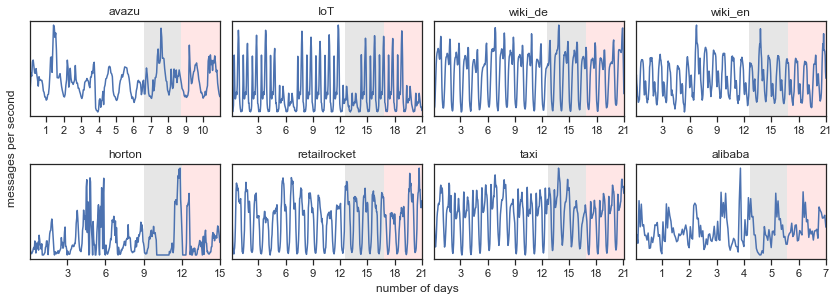

In [172]:
f, axs = plt.subplots(ncols=4, nrows=2, figsize=(12,4))
axs = [ax for axs_col in axs for ax in axs_col]
f.tight_layout(h_pad=2, w_pad=-2.5)
sns.set_theme(style='ticks')

for (dataset_name, df), ax in zip(datasets.items(), axs):
    sns.lineplot(data=df, ax=ax)
    
    ax.title.set_text(dataset_name)
    ax.set(xlabel="")
    ax.set_yticks([])
    #ax.set_xticks([])
    ax.margins(x=0)
    ax.get_legend().remove()

    l = len(df)-1
    start = df.index[0]
    start_val = df.index[int(l * 0.6)]
    start_test = df.index[int(l * 0.8)]
    end = df.index[l]
    
    if dataset_name in ["avazu", "alibaba"]:
        step = 1
    else:
        step = 3
    xticks = []
    xticklabels = []
    for days in range(0, 30, step):
        xticks.append(start + timedelta(days=days, hours=-1))
        xticklabels.append(days)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    
    ax.axvspan(xmin=start_val, xmax=start_test, color=(.9, .9, .9), zorder=-1)
    ax.axvspan(xmin=start_test, xmax=end, color=(1, .9, .9), zorder=-1)
    

f.text(0.5, 0, 'number of days', ha='center')
f.text(0.025, 0.5, 'messages per second', va='center', rotation='vertical')

plt.savefig("datasets.png", dpi=300, bbox_inches='tight')

In [156]:
df.index.days

,messages
date,
1970-01-02 00:00:00,110737.366412
1970-01-02 01:00:00,108985.174199
1970-01-02 02:00:00,103735.799994
1970-01-02 03:00:00,130622.887402
1970-01-02 04:00:00,114106.505128
...,...
1970-01-08 19:00:00,123146.360455
1970-01-08 20:00:00,119595.960476
1970-01-08 21:00:00,119834.841214


In [105]:
datasets["horton"].index[int(len(datasets["horton"]) * 0.6)]

Timestamp('2012-03-10 00:00:00')